### Problem 3: General Deep Network

**Implementation summary**  
This problem consists of multiple DNNs made of 3 and 5 hidden layers respectively.

However, This neural network is implemented very differently compared to the previous ones. This network is implemented using a dictionary which holds all the weights, biase, activation outputs and other variables generated by the network. 
These Dicitionaries are used since each weight and bias would have differnt dimension. If I were to use a n dimensional numpy array, I would have to create a fix lxmxn dimensional numpy array which would be difficult to handle when it comes to running loops and iterations.

The Network is more generalised and scalable. The Hidden layers are not hard coded and are programmatically created based on the number input by the user. 

The Backpropogation algorithm is also looped for all the layers instead of hard coding each equation. In a nutshell, this program is much more versatile compared to previous programs.

ReLU activation function is used in all the layers expcept for the Final Output layer. Which leads to ability of approximating non linear functions.

**Training**  
The training data and process is exactly the same as previous problem, both for 1D and 2D inputs.

#### Code

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\12403\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#Hyper parameters
NumOfIterations = 100
alpha = 0.0001
TrainingSize = 25

In [3]:
class ReLU_network():
    def __init__(self, x,y, layerDimensions):
        self.parameters = {} #Creating a Python Dictonary to Hold Weight and Bias Parameters.
        self.L = len(layerDimensions)  #Number of Layers in the Network.
        np.random.seed(2)
        for l in range(1,self.L):
            self.parameters['W' + str(l)] = np.random.randn(layerDimensions[l], layerDimensions[l-1])
            self.parameters['b' + str(l)] = np.random.randn(layerDimensions[l], 1)
        self.A = {}
        self.Z = {}
        self.y = y
        self.x = x
        self.Z['Z0'] = x
        self.deltas = {}
        self.m = len(x)
        
            
    def ReLU(self, Z):
        return np.maximum(Z, 0)
    
    def Feedforward(self, X):
        self.A['A0'] = X
        for l in range(1, self.L):
            self.Count = l
            self.Z['Z' + str(l)] = np.dot(self.A['A' + str(l-1)], self.parameters['W' + str(l)].T ) + self.parameters['b' + str(l)].T
            self.A['A' + str(l)] = self.ReLU(self.Z['Z' + str(l)])  
        self.A['A' + str(self.L - 1)] = self.Z['Z' + str(l)]
        return self.A['A' + str(self.L - 1)]
        
    
    def dReLU(self, Z):
        return 1.* (Z>0)
    
    def costFunction(self):
        self.A['A0'] = self.x
        self.A['A'+ str(self.L-1)] = self.Feedforward(self.x)
        Cost = 0.5*np.sum((self.y - self.A['A'+ str(self.L-1)])**2)/self.m
        return Cost
    
    
    def deltaCost(self):
        L = self.L
        self.A['A'+ str(L-1)] = self.Feedforward(self.x)
        self.deltas['delta' + str(L-1)] = np.multiply(-(self.y - self.A['A'+ str(self.L-1)]), self.dReLU(self.Z['Z'+ str(self.L-1)]))
        for l in range(L-1, 0, -1):
            self.deltas['dW' + str(l)] = np.dot(self.A['A' + str(l-1)].T, self.deltas["delta" + str(l)])/self.m
            self.deltas['db' + str(l)] = np.sum(self.deltas["delta" + str(l)])/self.m
            self.deltas["delta" + str(l-1)] = np.multiply(np.dot(self.deltas["delta" + str(l)], self.parameters['W' + str(l)] ), self.dReLU(self.Z['Z' + str(l-1)]))
        return self.deltas
    
    def UpdateParameters(self):
        for l in range(1,self.L):
            self.parameters['W' + str(l)] = self.parameters['W' + str(l)] - (alpha * self.deltas['dW' + str(l)]).T
            self.parameters['b' + str(l)] = self.parameters['b' + str(l)] - (alpha * self.deltas['db' + str(l)]).T

In [4]:
def Generate1DTrainingData(Size):
    x = np.linspace(-np.pi, (np.pi*5), Size).reshape(Size, 1)
    y = np.sin(x)
    return x, y

In [5]:
def Generate2DTrainingData(Size):
    x1 = np.linspace(-np.pi, (np.pi*5), Size).reshape(Size, 1)
    x2 = np.linspace(np.pi, (-np.pi*5), Size).reshape(Size, 1)
    y = np.sin(x1) + np.cos(x2+5)
    x = np.concatenate((x1,x2), axis=1)
    return x, y

##### 3 Hidden Layered Single dimensional Deep Neural Network

In [6]:
x,y = Generate1DTrainingData(TrainingSize)
NN1 = ReLU_network(x, y, [1,4,4,4,1])

Initial Cost = 108.89922095462302


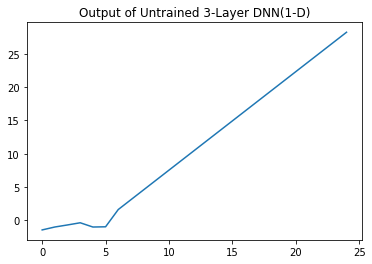

In [7]:
Output1 = NN1.Feedforward(x)
plot(Output1)
title("Output of Untrained 3-Layer DNN(1-D)")
cost1 = NN1.costFunction()
print("Initial Cost = " + str(cost1))

Final Cost = 0.32597922745711594


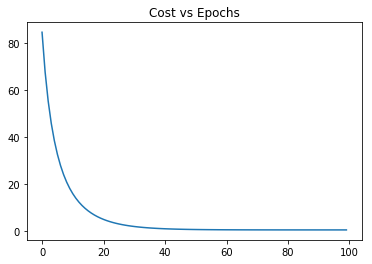

In [8]:
delta = NN1.deltaCost()
CostTracker1 = np.zeros(NumOfIterations)
for i in range(NumOfIterations):
    deltas1 = NN1.deltaCost()
    NN1.UpdateParameters()
    Output_New1 = NN1.Feedforward(x)
    CostTracker1[i] = NN1.costFunction()

plot(CostTracker1)
title("Cost vs Epochs")
print("Final Cost = " + str(CostTracker1[NumOfIterations-1]))

Text(0.5,1,'Output of Trained DNN')

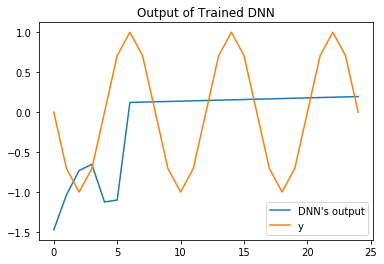

In [9]:
plot(Output_New1)
plot(y)
legend(["DNN's output", "y"])
title("Output of Trained DNN")

**Observations**

##### DNN with 3 Hidden Layers, 2D Input 

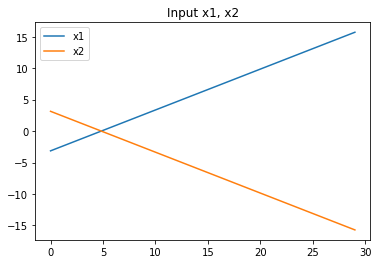

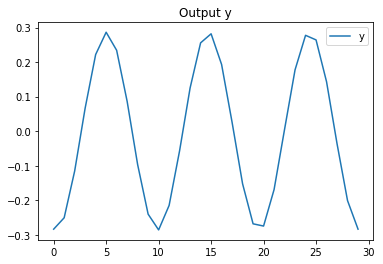

In [10]:
x,y = Generate2DTrainingData(30)
plot(x)
title("Input x1, x2")
legend(['x1', 'x2'])
figure()
title("Output y")
plot(y)
legend(['y'])

In [11]:
NN2 = ReLU_network(x, y, [2,4,2,4,1])

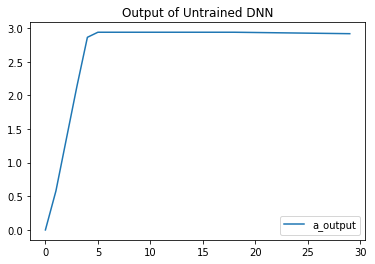

In [12]:
Output2 = NN2.Feedforward(x)
plot(Output2)
title("Output of Untrained DNN")
legend(["a_output"])

In [13]:
cost2 = NN2.costFunction()
print("Initial Cost = " +str(cost2))

Initial Cost = 3.83214921259981


Final Cost = 0.05586596674289882


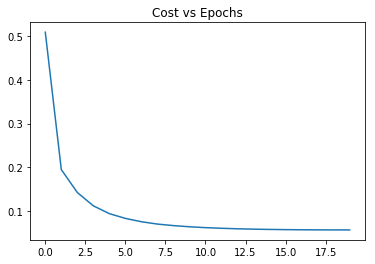

In [14]:
delta2 = NN2.deltaCost()
NumOfIterations = 20
alpha = 0.055
CostTracker2 = np.zeros(NumOfIterations)
for i in range(NumOfIterations):
    deltas2 = NN2.deltaCost()
    NN2.UpdateParameters()
    Output_New2 = NN2.Feedforward(x)
    CostTracker2[i] = NN2.costFunction()

plot(CostTracker2)
title("Cost vs Epochs")
print("Final Cost = " + str(CostTracker2[NumOfIterations-1]))

Text(0.5,1,'Comparision of Output of DNN with y')

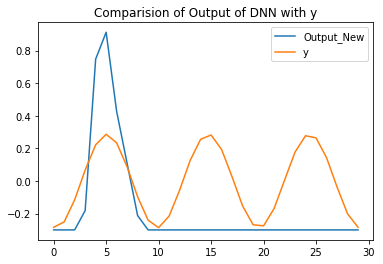

In [15]:
plot(Output_New2)
plot(y)
legend(['Output_New', 'y'])
title('Comparision of Output of DNN with y')

##### DNN with 5 Hidden Layers, 2D Input 

In [16]:
#Hyper Parameters
NumOfIterations = 500
alpha = 0.001
TrainingSize = 40

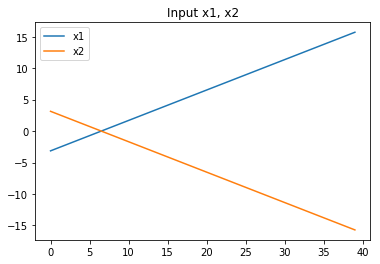

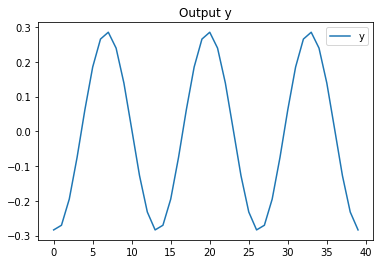

In [17]:
x,y = Generate2DTrainingData(TrainingSize)
plot(x)
title("Input x1, x2")
legend(['x1', 'x2'])
figure()
title("Output y")
plot(y)
legend(['y'])

In [18]:
NN3 = ReLU_network(x, y, [2,2,5,5,3,1,1])

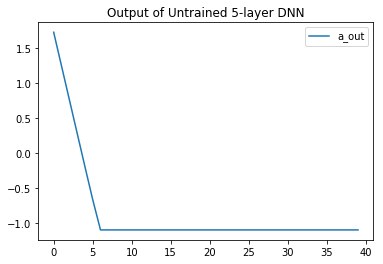

In [19]:
Output3 = NN3.Feedforward(x)
plot(Output3)
title("Output of Untrained 5-layer DNN")
legend(['a_out'])

In [20]:
cost3 = NN3.costFunction()
print("Initial Cost = " + str(cost3))

Initial Cost = 0.6409212525507624


Final Cost = 0.5684536441842688


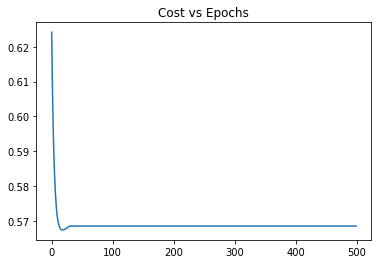

In [21]:
delta3 = NN3.deltaCost()
CostTracker3 = np.zeros(NumOfIterations)
for i in range(NumOfIterations):
    deltas3 = NN3.deltaCost()
    NN3.UpdateParameters()
    Output_New3 = NN3.Feedforward(x)
    CostTracker3[i] = NN3.costFunction()

plot(CostTracker3)
title("Cost vs Epochs")
print("Final Cost = " + str(CostTracker3[NumOfIterations-1]))

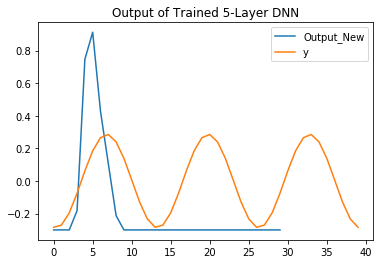

In [22]:
plot(Output_New2)
plot(y)
title("Output of Trained 5-Layer DNN")
legend(['Output_New', 'y'])

**Observations**

###### Q3. B 
*Play around with different choices of hyperparameters. Based on your experience,
do you think it is easier or harder to choose effective hyperparameters
for a deeper network than for the shallow network? Explain?*

I felt it much easier to tune hyper-parameters for a shallow network. The primary reason I believe is because in a shallow network, When the input model is known and is a simple equation. It is more intutive to tune it since there are lesser number of equations. (because of lesser neurons) and it is intuitive to guess why the output is the way it. The errors are intuitively traceable. 
As the number of Neurons and number of layers increase, We have very little idea about how much each parameter contributes to the net output.

Furthermore, In a shallow network, tweaking a hyper-parameter, results in significant change in the result and it is easier to recognise patterns as to how a hyper-parameter affects the training efficiency. As the number of inputs and layers increase, It gets harder and harder

###### Q3. C  
*Do some experiments to determine whether the depth of a network has
any significant effect on how quickly your network can converge to a good
solution. Include at least one plot to justify your conclusions.*  


To study the effect of depth on convergence, We take a simple 1-D input data and check for convergence on various depths and study the rate of convergence at each level.

**2 Layer Network**

In [23]:
x,y = Generate1DTrainingData(TrainingSize)
NN4 = ReLU_network(x, y, [1,5,3,1])

Initial Cost = 2.4488777476424213


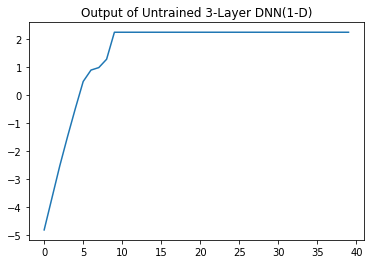

In [24]:
Output4 = NN4.Feedforward(x)
plot(Output4)
title("Output of Untrained 3-Layer DNN(1-D)")
cost4 = NN4.costFunction()
print("Initial Cost = " + str(cost4))

Final Cost = 1.8059865210489296


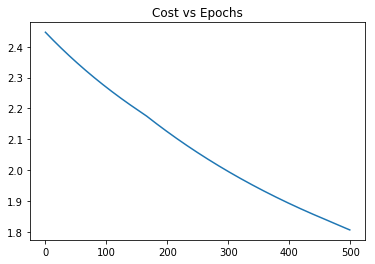

In [25]:
delta = NN4.deltaCost()
CostTracker4 = np.zeros(NumOfIterations)
for i in range(NumOfIterations):
    deltas4 = NN4.deltaCost()
    NN4.UpdateParameters()
    Output_New4 = NN4.Feedforward(x)
    CostTracker4[i] = NN4.costFunction()

plot(CostTracker4)
title("Cost vs Epochs")
print("Final Cost = " + str(CostTracker4[NumOfIterations-1]))

Text(0.5,1,'Output of Trained DNN')

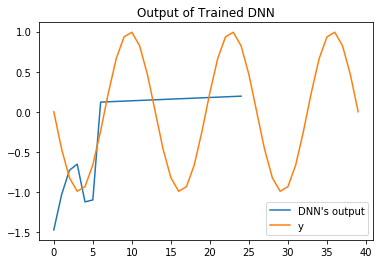

In [26]:
plot(Output_New1)
plot(y)
legend(["DNN's output", "y"])
title("Output of Trained DNN")

We already have created a 3 layered Network in the previous part of this exercise. We shall go ahead and create a 5 layered 1D Neural Network.

**5 Layered Network**

In [27]:
x,y = Generate1DTrainingData(TrainingSize)
NN5 = ReLU_network(x, y, [1,4,4,4,4,4,1])

Initial Cost = 10.030617001858877


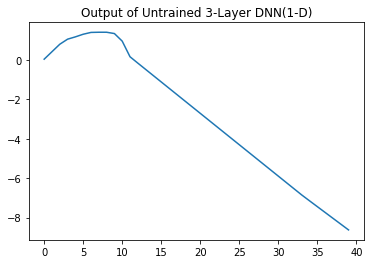

In [28]:
Output5 = NN5.Feedforward(x)
plot(Output5)
title("Output of Untrained 3-Layer DNN(1-D)")
cost5 = NN5.costFunction()
print("Initial Cost = " + str(cost5))

Final Cost = 9.587834898533492


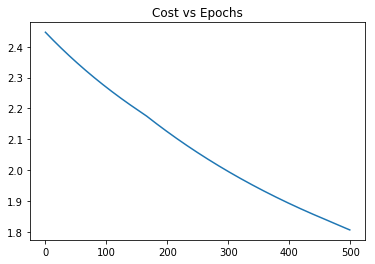

In [29]:
delta5 = NN5.deltaCost()
CostTracker5 = np.zeros(NumOfIterations)
for i in range(NumOfIterations):
    deltas5 = NN5.deltaCost()
    NN5.UpdateParameters()
    Output_New5 = NN5.Feedforward(x)
    CostTracker5[i] = NN5.costFunction()

plot(CostTracker4)
title("Cost vs Epochs")
print("Final Cost = " + str(CostTracker5[NumOfIterations-1]))

Text(0.5,1,'Output of Trained DNN')

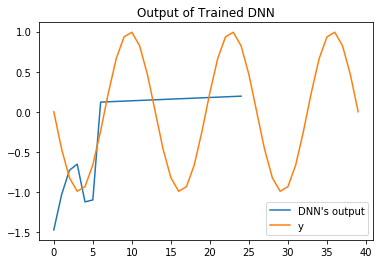

In [30]:
plot(Output_New1)
plot(y)
legend(["DNN's output", "y"])
title("Output of Trained DNN")

### Results and Comments

As we observe from the above plots and analysis, as we increase the depth or layers in a neural network, the rate of convergence decreases whilst keeping maintaining a constant rate of learning. 

Hence Higher number of Iterations need to be run through to train the same values in a Deeper Neural Network. Hence by Observing the above results and the results of other problems in general, We establish that deeper the network, longer it takes to converge, provided other Hyper-parameters aren't changed much.